In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [49]:
df = pd.read_csv('fifa21_raw_data.csv', low_memory=False)

In [50]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [51]:
df.isnull().sum()

photoUrl                0
LongName                0
playerUrl               0
Nationality             0
Positions               0
Name                    0
Age                     0
↓OVA                    0
POT                     0
Team & Contract         0
ID                      0
Height                  0
Weight                  0
foot                    0
BOV                     0
BP                      0
Growth                  0
Joined                  0
Loan Date End       17966
Value                   0
Wage                    0
Release Clause          0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                 0
Skill                   0
Dribbling               0
Curve                   0
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                 0
Reactions   

In [52]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

data_types = df.dtypes
print(data_types)

photoUrl            object
LongName            object
playerUrl           object
Nationality         object
Positions           object
Name                object
Age                  int64
↓OVA                 int64
POT                  int64
Team & Contract     object
ID                   int64
Height              object
Weight              object
foot                object
BOV                  int64
BP                  object
Growth               int64
Joined              object
Loan Date End       object
Value               object
Wage                object
Release Clause      object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
Ball Control         int64
Movement             int64
Acceleration         int64
Sprint Speed         int64
A

Challenges:
1. Convert the height and weight columns to numerical forms
2. Remove the unnecessary newline characters from all columns that have them.
3. Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
4. 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
5. How many players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [53]:
df['Weight'].head(5)

0    159lbs
1    183lbs
2    192lbs
3    154lbs
4    150lbs
Name: Weight, dtype: object

In [54]:
df['Height'].head(5)

0     5'7"
1     6'2"
2     6'2"
3    5'11"
4     5'9"
Name: Height, dtype: object

In [55]:
def height_to_inches(height):
    feet, inches = height.split("'")
    return int(feet) * 12 + int(inches.replace('"', ''))

In [56]:
df['Height'] = df['Height'].apply(height_to_inches)

In [57]:
df['Height'].head(5)

0    67
1    74
2    74
3    71
4    69
Name: Height, dtype: int64

In [58]:
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(int)

In [59]:
df['Weight'].head(5)

0    159
1    183
2    192
3    154
4    150
Name: Weight, dtype: int64

In [60]:
# remove unnecessary newline characters

df['Team & Contract'].value_counts()

Team & Contract
\n India\nFree\n\n                                                       29
\n Ecuador\nFree\n\n                                                     24
\n Uruguay\nFree\n\n                                                     23
\n\n\n\nGoiás\n2019 ~ 2023\n\n                                           20
\n\n\n\nVasco da Gama\n2019 ~ 2023\n\n                                   20
\n\n\n\nFortaleza\n2019 ~ 2023\n\n                                       20
\n\n\n\nCeará Sporting Club\n2019 ~ 2023\n\n                             20
\n\n\n\nFlamengo\n2019 ~ 2023\n\n                                        20
\n\n\n\nBahia\n2019 ~ 2023\n\n                                           20
\n\n\n\nSão Paulo\n2019 ~ 2023\n\n                                       20
\n\n\n\nAtlético Clube Goianiense\n2019 ~ 2023\n\n                       20
\n\n\n\nClub Athletico Paranaense\n2019 ~ 2023\n\n                       20
\n\n\n\nGrêmio\n2019 ~ 2023\n\n                                         

In [61]:
df=df.replace('\n','',regex=True)

In [62]:
df['Team & Contract'].value_counts()

Team & Contract
 IndiaFree                                                 29
 EcuadorFree                                               24
 UruguayFree                                               23
Goiás2019 ~ 2023                                           20
Vasco da Gama2019 ~ 2023                                   20
Fortaleza2019 ~ 2023                                       20
Ceará Sporting Club2019 ~ 2023                             20
Flamengo2019 ~ 2023                                        20
Bahia2019 ~ 2023                                           20
São Paulo2019 ~ 2023                                       20
Atlético Clube Goianiense2019 ~ 2023                       20
Club Athletico Paranaense2019 ~ 2023                       20
Grêmio2019 ~ 2023                                          20
Botafogo2019 ~ 2023                                        20
Atlético Mineiro2019 ~ 2023                                20
Palmeiras2019 ~ 2023                                  

In [63]:
# Based on the 'Joined' column, checking which players have been playing 
# at a club for more than 10 years!

from datetime import datetime

# column with dates in the format "MM d, yyyy"

# Convert the 'Joined' column to datetime
df['Joined'] = pd.to_datetime(df['Joined'], format='%b %d, %Y')

df['Years_at_club'] = (datetime.now() - df['Joined']).dt.days / 365.25
# Filter for players who have been at the club for more than 10 years
veterans = df[df['Years_at_club'] > 10]
print (veterans['Name'])

0                  L. Messi
2                  J. Oblak
5            R. Lewandowski
11            M. ter Stegen
12                 Casemiro
14                 M. Neuer
15               K. Benzema
16             Sergio Ramos
17                S. Agüero
23                  H. Kane
24             K. Koulibaly
26                 T. Kroos
27            S. Handanovič
40          Sergio Busquets
44                L. Modrić
46                H. Lloris
47             G. Chiellini
48                 J. Vardy
49                 Carvajal
50                R. Varane
51              M. Verratti
53                   De Gea
54                T. Müller
55               Jordi Alba
56             J. Henderson
58                Y. Sommer
60                    Piqué
66              M. Rashford
75               Marquinhos
81               L. Insigne
82                     Koke
90                  M. Reus
97               D. Mertens
102               Oyarzabal
105              J. Giménez
117                 

In [64]:
# 'Value', 'Wage' and "Release Clause' are string columns. Converting 
# them to numbers. For eg, "M" in value column  is Million, so multiply 
# the row values by 1,000,000, etc.

def convert_financials(i):
    # Remove the currency symbol
    i = i.replace('€', '')

    # Convert millions 'M' to a number
    if 'M' in i:
        return float(i.replace('M', '')) * 1e6

    # Convert thousands 'K' to a number
    elif 'K' in i:
        return float(i.replace('K', '')) * 1e3

    # Return the value as it is
    return float(i)

# Apply the function to each of the financial columns
df['Value'] = df['Value'].apply(convert_financials)
df['Wage'] = df['Wage'].apply(convert_financials)
df['Release Clause'] = df['Release Clause'].apply(convert_financials)

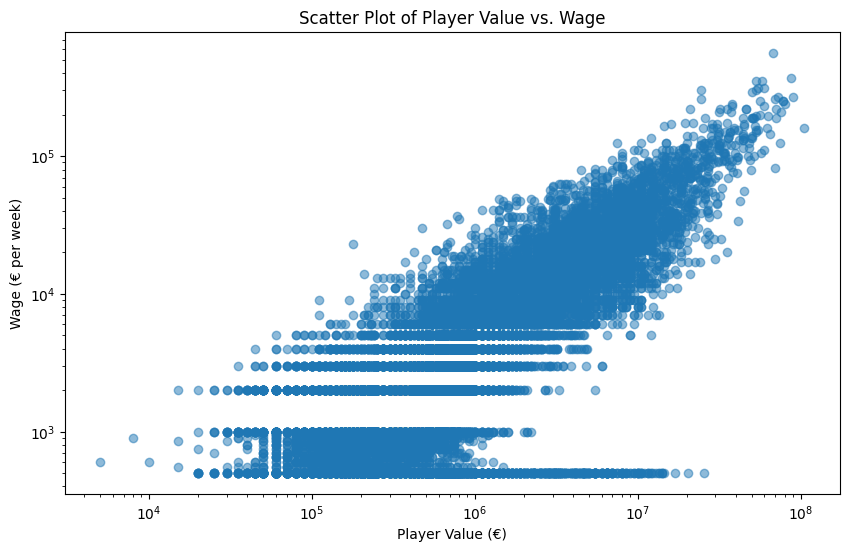

In [65]:
# How many players are highly valuable but still underpaid (on low wages)? 
# (hint: scatter plot between wage and value)

plt.figure(figsize=(10, 6))
plt.scatter(df['Value'], df['Wage'], alpha=0.5)
plt.title('Scatter Plot of Player Value vs. Wage')
plt.xlabel('Player Value (€)')
plt.ylabel('Wage (€ per week)')
plt.xscale('log')
plt.yscale('log')
plt.show()